# **Università degli Studi di Bari Aldo Moro**
### - Dipartimento di Informatica
### - Corso di Laurea in Informatica e Tecnologie per la Produzione del Software

---

# **Tesi di Laurea**

**Titolo:**  
* *Implementazione e Addestramento di Modelli di Intelligenza Artificiale per il Riconoscimento della Menzogna attraverso l'Analisi delle espressioni Facciali e Testuali*

**Studente:**  
* Salvatore Forte,
* Matricola: 737321

**Relatore:**  
* Vita Santa Barletta  

**Anno Accademico:**  
* 2023/2024

---

# Step 1:  
### Importazione dei file .xlsx del dataset "SAMM" e Preprocessing

1. Importiamo i file .xlsx del dataset "SAMM" per l'elaborazione.

2. Effettuiamo il preprocessing dei dati per preparare il dataset all'analisi e all'addestramento del modello.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Definire il percorso principale in cui sarà contenuto tutto il materiale che tratteremo
base_path_workspace = "/content/drive/MyDrive/Workspace_Tesi"

# Definire il percorso base del workspace
base_path_datasets = '/content/drive/MyDrive/Workspace_Tesi/Datasets'
base_path_processed_data_files = '/content/drive/MyDrive/Workspace_Tesi/New_Processed_Data_Files'

# Percorso del file xlsx del dataset
samm_path = base_path_datasets + '/SAMM/SAMM_Micro_FACS_Codes_v2.xlsx'


# Importare i file .xlsx
samm_data = pd.read_excel(samm_path, skiprows=13)  # Salta le prime 13 righe


## *Inizio della fase di preprocessing del dataset (SAMM)*


Visualizzazione delle informazini contenute nel file "SAMM_Micro_FACS_Codes_v2.xlsx"

In [ ]:
# Visualizzare le informazioni di base sul dataset SAMM
print("Informazioni generali sul dataset SAMM:")
print(samm_data.info())


# Visualizzare le prime righe del dataset SAMM
print("\nPrime righe del dataset SAMM:")
print(samm_data.head())


# Visualizzare le colonne presenti nel dataset SAMM
print("\nColonne presenti nel dataset SAMM:")
print(samm_data.columns)


# Contare i valori nulli nel dataset SAMM
print("\nValori nulli nel dataset SAMM:")
print(samm_data.isnull().sum())

Informazioni generali sul dataset SAMM:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject            159 non-null    int64 
 1   Filename           159 non-null    object
 2   Inducement Code    159 non-null    int64 
 3   Onset Frame        159 non-null    int64 
 4   Apex Frame         159 non-null    int64 
 5   Offset Frame       159 non-null    int64 
 6   Duration           159 non-null    int64 
 7   Micro              159 non-null    object
 8   Action Units       159 non-null    object
 9   Estimated Emotion  159 non-null    object
 10  Objective Classes  159 non-null    int64 
 11  Notes              61 non-null     object
dtypes: int64(7), object(5)
memory usage: 15.0+ KB
None

Prime righe del dataset SAMM:
   Subject Filename  Inducement Code  Onset Frame  Apex Frame  Offset Frame  \
0        6  006_1_2            

In [ ]:
# Rimuovi colonne non necessarie,
samm_data_cleaned = samm_data.drop(columns=['Inducement Code', 'Duration', 'Micro', 'Action Units', 'Objective Classes', 'Notes'])

# Visualizzare le prime righe dopo aver rimosso le colonne
print("\nPrime righe del dataset SAMM:")
print(samm_data_cleaned.head())


Prime righe del dataset SAMM:
   Subject Filename  Onset Frame  Apex Frame  Offset Frame Estimated Emotion
0        6  006_1_2         5562        5588          5632             Anger
1        6  006_1_3         3912        3948          3988             Anger
2        6  006_1_4         2324        2368          2403             Anger
3        6  006_1_5         5343        5388          5424             Anger
4        6  006_1_6         7160        7197          7259             Anger


In [ ]:
# Contare i valori nulli nel dataset SAMM
print("\nValori nulli nel dataset SAMM:")
print(samm_data_cleaned.isnull().sum())


Valori nulli nel dataset SAMM:
Subject              0
Filename             0
Onset Frame          0
Apex Frame           0
Offset Frame         0
Estimated Emotion    0
dtype: int64


In [ ]:
# Controllare nuovamente i tipi di dati dopo la pulizia
print("\nTipi di dati dopo la pulizia:")
print(samm_data_cleaned.dtypes)


Tipi di dati dopo la pulizia:
Subject               int64
Filename             object
Onset Frame           int64
Apex Frame            int64
Offset Frame          int64
Estimated Emotion    object
dtype: object


In [ ]:
# Controllare i valori unici nella colonna 'Estimated Emotion'
unique_emotions = samm_data_cleaned['Estimated Emotion'].unique()
print("\nValori unici in 'Estimated Emotion':", unique_emotions)


Valori unici in 'Estimated Emotion': ['Anger' 'Sadness' 'Surprise' 'Fear' 'Other' 'Happiness' 'Disgust'
 'Contempt']


In [ ]:
# Definisci un dizionario per mappare le emozioni nel dataset SAMM
samm_emotion_mapping = {
    'Happiness': 0,
    'Surprise': 1,
    'Anger': 2,
    'Sadness': 3,
    'Fear': 4,
    'Disgust': 5,
    'Other': 6,
    'Contempt': 7
}

# Mappatura per SAMM
samm_data_cleaned['Emotion Value'] = samm_data_cleaned['Estimated Emotion'].map(samm_emotion_mapping)

# Visualizzare le prime righe per verificare
print(samm_data_cleaned.head())

   Subject Filename  Onset Frame  Apex Frame  Offset Frame Estimated Emotion  \
0        6  006_1_2         5562        5588          5632             Anger   
1        6  006_1_3         3912        3948          3988             Anger   
2        6  006_1_4         2324        2368          2403             Anger   
3        6  006_1_5         5343        5388          5424             Anger   
4        6  006_1_6         7160        7197          7259             Anger   

   Emotion Value  
0              2  
1              2  
2              2  
3              2  
4              2  


In [ ]:
# Aggiungi la colonna 'Path'
samm_data_cleaned['Path'] = 'SAMM/SAMM_IEEETAC_Movements/' + samm_data_cleaned['Filename']

# Visualizzare le prime righe per verificare
print(samm_data_cleaned.head())

   Subject Filename  Onset Frame  Apex Frame  Offset Frame Estimated Emotion  \
0        6  006_1_2         5562        5588          5632             Anger   
1        6  006_1_3         3912        3948          3988             Anger   
2        6  006_1_4         2324        2368          2403             Anger   
3        6  006_1_5         5343        5388          5424             Anger   
4        6  006_1_6         7160        7197          7259             Anger   

   Emotion Value                                 Path  
0              2  SAMM/SAMM_IEEETAC_Movements/006_1_2  
1              2  SAMM/SAMM_IEEETAC_Movements/006_1_3  
2              2  SAMM/SAMM_IEEETAC_Movements/006_1_4  
3              2  SAMM/SAMM_IEEETAC_Movements/006_1_5  
4              2  SAMM/SAMM_IEEETAC_Movements/006_1_6  


In questa fase dovremmo visualizzare un campione, ma essendo che abbiamo dei file .mat dobbiamo procedere creando lo script che ci consente di estrarre tutte le immagini già croppate.

In [ ]:
import scipy.io

# Percorso del file .mat
mat_file_path = base_path_datasets + '/SAMM/SAMM_IEEETAC_Movements/006_1_2.mat'

# Carica il file .mat
mat_data = scipy.io.loadmat(mat_file_path)

# Visualizza le chiavi nel dizionario per vedere le variabili disponibili
print("Variabili nel file .mat:")
for key in mat_data.keys():
    print(key)

Variabili nel file .mat:
__header__
__version__
__globals__
tempImg


In [ ]:
# Visualizza informazioni sulla variabile tempImg
if 'tempImg' in mat_data:
    temp_img_data = mat_data['tempImg']
    print("Tipo di tempImg:", type(temp_img_data))
    print("Forma di tempImg:", temp_img_data.shape)
    print("Contenuto di tempImg (primi 5 elementi):", temp_img_data[0, :5])  # Mostra solo i primi 5 elementi se è un array
else:
    print("La variabile 'tempImg' non è presente nel file.")


Tipo di tempImg: <class 'numpy.ndarray'>
Forma di tempImg: (438, 438, 71)
Contenuto di tempImg (primi 5 elementi): [[30 30 30 28 28 28 30 27 27 30 31 28 28 28 27 29 28 27 28 27 26 28 29 25
  30 28 30 31 30 29 29 27 28 27 31 25 27 30 31 31 30 32 33 28 32 28 31 30
  31 31 31 30 32 34 32 35 35 33 38 35 35 37 35 33 37 36 39 36 33 37 35]
 [32 32 32 31 31 31 33 30 30 32 33 31 31 31 32 31 30 30 31 30 29 30 31 29
  32 30 32 33 32 31 31 30 31 30 33 29 31 32 33 34 32 35 35 32 34 32 35 34
  34 34 34 35 36 38 36 38 37 38 40 39 40 41 41 40 42 41 42 41 40 42 44]
 [36 37 37 35 36 36 36 35 35 37 38 36 36 36 37 36 35 35 36 35 35 35 36 34
  37 34 35 36 37 36 36 35 35 35 36 34 36 37 36 37 36 38 40 38 38 38 40 39
  39 40 40 41 43 44 42 44 42 44 44 46 48 48 48 49 50 50 48 49 50 50 54]
 [41 41 41 41 42 41 40 40 40 41 42 41 41 41 41 40 39 40 41 40 41 39 40 40
  41 38 39 40 41 40 40 40 38 40 40 40 42 41 40 41 41 42 44 44 43 45 46 45
  45 46 46 49 50 50 49 50 51 51 51 53 56 55 55 58 57 58 57 57 60 59 63]
 [47 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd

# Percorso della directory contenente i file .mat
mat_directory = base_path_datasets + '/SAMM/SAMM_IEEETAC_Movements'

# Percorso della directory in cui verranno salvate le immagini estratte dei file .mat
save_directory = base_path_datasets + '/SAMM/SAMM_IEEETAC_Movements_Extract'

# Itera attraverso ogni riga del DataFrame `samm_data_cleaned`
for index, row in samm_data_cleaned.iterrows():
    filename = row['Filename']
    onset_frame = int(row['Onset Frame'])
    offset_frame = int(row['Offset Frame'])

    # Percorso del file .mat corrispondente
    mat_file_path = os.path.join(mat_directory, f'{filename}.mat')

    print(f'Processando il file: {mat_file_path}...')

    # Carica il file .mat
    try:
        mat_data = scipy.io.loadmat(mat_file_path)
    except Exception as e:
        print(f'Errore nel caricamento del file {mat_file_path}: {e}')
        continue

    # Estrai tempImg
    if 'tempImg' not in mat_data:
        print(f'Il file .mat {filename} non contiene immagini in un array denominato tempImg.')
        continue

    temp_img_data = mat_data['tempImg']

    # Crea una cartella per salvare le immagini estratte
    output_dir = os.path.join(save_directory, filename)
    os.makedirs(output_dir, exist_ok=True)

    # Salva le immagini
    for i in range(onset_frame, offset_frame + 1):
        # Estrai l'immagine
        img = temp_img_data[:, :, i - onset_frame]  # Ottieni il frame corretto

        # Normalizza i pixel nell'intervallo [0, 1] per il salvataggio
        img_normalized = (img - np.min(img)) / (np.max(img) - np.min(img))

        # Salva l'immagine
        img_name = f'{filename[:3]}_{i}.jpg'  # Usa solo le prime 4 cifre di filename + frame
        plt.imsave(os.path.join(output_dir, img_name), img_normalized, cmap='gray')

    print(f'Immagini estratte e salvate nella cartella: {output_dir}')

print("Processo completato.")


Processando il file: /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements/006_1_2.mat...
Immagini estratte e salvate nella cartella: /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements_Extract/006_1_2
Processando il file: /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements/006_1_3.mat...
Immagini estratte e salvate nella cartella: /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements_Extract/006_1_3
Processando il file: /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements/006_1_4.mat...
Immagini estratte e salvate nella cartella: /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements_Extract/006_1_4
Processando il file: /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements/006_1_5.mat...
Immagini estratte e salvate nella cartella: /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements_Extract/006_1_5
Processando il f

In [ ]:
# Aggiungi la colonna 'Path' al dataframe basata sulla colonna 'Filename'
samm_data_cleaned['Path'] = 'SAMM/SAMM_IEEETAC_Movements_Extract/' + samm_data_cleaned['Filename']
samm_data_cleaned['Dataset'] = 'SAMM'  # Aggiunge la colonna con il nome del dataset


# Visualizzare le prime righe per verificare
print(samm_data_cleaned.head())

   Subject Filename  Onset Frame  Apex Frame  Offset Frame Estimated Emotion  \
0        6  006_1_2         5562        5588          5632             Anger   
1        6  006_1_3         3912        3948          3988             Anger   
2        6  006_1_4         2324        2368          2403             Anger   
3        6  006_1_5         5343        5388          5424             Anger   
4        6  006_1_6         7160        7197          7259             Anger   

   Emotion Value                                         Path Dataset  
0              2  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_2    SAMM  
1              2  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_3    SAMM  
2              2  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_4    SAMM  
3              2  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_5    SAMM  
4              2  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_6    SAMM  


In [ ]:
# Percorso per il salvataggio del dataset pulito
processed_data_path = base_path_processed_data_files + '/SAMM_cleaned.xlsx'

# Salvare il dataset pulito in un nuovo file xlsx
samm_data_cleaned.to_excel(processed_data_path, index=False)

print("\nDataset SAMM pulito e salvato come 'SAMM_cleaned.xlsx' nella cartella New_Processed_Data_Files.")


Dataset SAMM pulito e salvato come 'SAMM_cleaned.xlsx' nella cartella New_Processed_Data_Files.


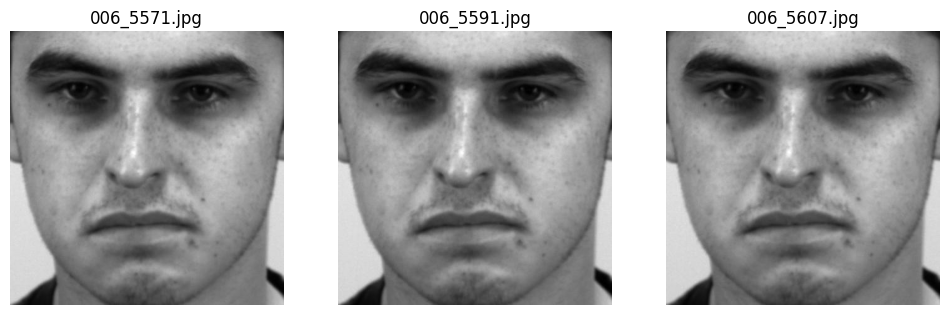

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

def mostra_campioni_immagini(path, num_campioni=3):
    # Controlla se il percorso esiste
    if not os.path.exists(path):
        print(f"Il percorso {path} non esiste.")
        return

    # Ottieni tutte le immagini nella cartella
    immagini = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.bmp'))]

    # Se ci sono meno immagini rispetto al numero di campioni richiesti, modifica il numero
    num_campioni = min(num_campioni, len(immagini))

    # Seleziona un campione casuale di immagini
    campioni = random.sample(immagini, num_campioni)

    # Mostra le immagini campione
    plt.figure(figsize=(12, 8))
    for i, img_name in enumerate(campioni):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        plt.subplot(1, num_campioni, i + 1)  # Mostra in una riga
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(img_name)
        plt.axis('off')  # Nascondi gli assi
    plt.show()



# Prendi il primo Path dal DataFrame per il dataset SAMM
esempio_path = samm_data_cleaned['Path'].iloc[0]

# Combinare il percorso di base con il percorso preso dal DataFrame
completo_path = os.path.join(base_path_datasets, esempio_path)

# Visualizza i campioni
mostra_campioni_immagini(completo_path, num_campioni=3)

# Step 2:  
### Esplorazione e Visualizzazione dei Campioni di Immagini

1. Creiamo un file di filtraggio, contenente solo la sequenza di frame che ci interessa, per uniformare le sequenze di frame da utilizzare per l'addestramento. In questo modo, sarà possibile verificare se i dataset sono bilanciati o sbilanciati.

2. Visualizziamo delle immagini campione utilizzando il codice già creato, per esaminare il formato e il tipo delle immagini.

3. Verifichiamo il bilanciamento delle classi nel nuovo dataset. Se le classi risultano sbilanciate, applichiamo tecniche di data augmentation su intere sequenze temporali per bilanciarle.

4. Una volta completate queste procedure, avremo ottenuto il dataset pronto per l'addestramento del modello.


In [ ]:
import pandas as pd
import numpy as np

# Funzione per campionare i frame
def sample_frames(onset, apex, offset, n_frames=10):
    # Crea un insieme di frame iniziali contenente onset, apex e offset
    frame_indices = {onset, apex, offset}

    # Calcola il numero totale di frame disponibili
    total_frames = offset - onset + 1

    # Se ci sono meno frame disponibili di quelli richiesti, restituisci tutti i frame disponibili
    if total_frames <= n_frames:
        return np.arange(onset, offset + 1)

    # Calcola il numero di frame da campionare oltre onset, apex e offset
    remaining_frames = n_frames - len(frame_indices)

    # Crea una gamma di frame da onset a offset, escludendo già onset, apex e offset
    frames_to_sample = np.setdiff1d(np.arange(onset, offset + 1), list(frame_indices))

    # Campiona i frame rimanenti
    if remaining_frames > 0:
        if len(frames_to_sample) >= remaining_frames:
            sampled_remaining = np.random.choice(frames_to_sample, size=remaining_frames, replace=False)
        else:
            sampled_remaining = frames_to_sample  # Prendi tutto se non ci sono abbastanza frame
    else:
        sampled_remaining = []

    # Unisci i frame iniziali con i frame campionati e ordina il risultato
    frame_indices.update(sampled_remaining)
    return np.sort(np.unique(list(frame_indices)))

# Carica il file merged_dataset.xlsx
df = pd.read_excel(base_path_processed_data_files + '/SAMM_cleaned.xlsx')

# Definisci il numero di frame da campionare, "modificando questo valore si può ridurre o aumentare la sequenza di frame che si prendono in considerazione"
n_frames = 5

# Crea una lista per memorizzare i risultati
output_data = []

# Ciclo su ogni riga del DataFrame
for index, row in df.iterrows():
    onset = row['Onset Frame']
    apex = row['Apex Frame']
    offset = row['Offset Frame']

    # Campionamento dei frame
    sampled_frames = sample_frames(onset, apex, offset, n_frames)

    # Crea una nuova riga di dati con i frame campionati
    output_data.append({
        'Dataset': row['Dataset'],
        'Subject': row['Subject'],
        'Filename': row['Filename'],
        'Estimated Emotion': row['Estimated Emotion'],
        'Emotion Value': row['Emotion Value'],
        'Frame Sequence': list(sampled_frames),  # Trasforma l'array dei frame in una lista
        'Path': row['Path']
    })

# Creiamo un DataFrame con i dati risultanti
output_df = pd.DataFrame(output_data)

# Funzione per calcolare il numero di frame
def count_frames(frame_sequence):
    return len(frame_sequence)

print("Prime righe del DataFrame:")
print(output_df.head())

Prime righe del DataFrame:
  Dataset  Subject Filename Estimated Emotion  Emotion Value  \
0    SAMM        6  006_1_2             Anger              2   
1    SAMM        6  006_1_3             Anger              2   
2    SAMM        6  006_1_4             Anger              2   
3    SAMM        6  006_1_5             Anger              2   
4    SAMM        6  006_1_6             Anger              2   

                   Frame Sequence                                         Path  
0  [5562, 5580, 5588, 5594, 5632]  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_2  
1  [3912, 3923, 3927, 3948, 3988]  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_3  
2  [2324, 2354, 2368, 2380, 2403]  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_4  
3  [5343, 5382, 5388, 5390, 5424]  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_5  
4  [7160, 7197, 7226, 7251, 7259]  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_6  


In [ ]:
# Calcola il numero di frame per ogni riga (lunghezza della lista in Frame_Sequence)
output_df['Num Frames'] = output_df['Frame Sequence'].apply(count_frames)

print("Prime righe del DataFrame:")
print(output_df.head())

Prime righe del DataFrame:
  Dataset  Subject Filename Estimated Emotion  Emotion Value  \
0    SAMM        6  006_1_2             Anger              2   
1    SAMM        6  006_1_3             Anger              2   
2    SAMM        6  006_1_4             Anger              2   
3    SAMM        6  006_1_5             Anger              2   
4    SAMM        6  006_1_6             Anger              2   

                   Frame Sequence  \
0  [5562, 5580, 5588, 5594, 5632]   
1  [3912, 3923, 3927, 3948, 3988]   
2  [2324, 2354, 2368, 2380, 2403]   
3  [5343, 5382, 5388, 5390, 5424]   
4  [7160, 7197, 7226, 7251, 7259]   

                                          Path  Num Frames  
0  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_2           5  
1  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_3           5  
2  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_4           5  
3  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_5           5  
4  SAMM/SAMM_IEEETAC_Movements_Extract/006_1_6           5  

In [ ]:
# Mostra tutti i valori unici nella colonna 'Num Frames'
unique_values = output_df['Num Frames'].unique()
print("Valori unici in 'Num Frames':", unique_values)


Valori unici in 'Num Frames': [5]


Prima di salvare il dataframe dovrei ottenere il path di riferimento di ogni singolo frame

In [ ]:
# Funzione per creare il percorso esatto di ogni frame specifico per il dataset SAMM
def create_frame_paths_samm(row):
    frame_sequence = row['Frame Sequence']  # Ottieni i numeri dei frame
    path = row['Path']  # Ottieni il percorso base della riga
    Subject = str(row['Subject']).zfill(3)

    # Crea i percorsi per ogni frame nel formato SAMM: path/<subject_frame>.jpg
    frame_paths = [f"{path}/{Subject}_{frame_num}.jpg" for frame_num in frame_sequence]

    return frame_paths

# Applica la funzione per creare una nuova colonna 'Frame_Paths' e aggiungi una colonna 'Dataset' con valore 'SAMM'
output_df['Frame Paths'] = output_df.apply(create_frame_paths_samm, axis=1)

# Visualizza le prime righe del DataFrame per confermare
print(output_df[['Dataset', 'Frame Sequence', 'Frame Paths', 'Estimated Emotion', 'Emotion Value']].head())


  Dataset                  Frame Sequence  \
0    SAMM  [5562, 5580, 5588, 5594, 5632]   
1    SAMM  [3912, 3923, 3927, 3948, 3988]   
2    SAMM  [2324, 2354, 2368, 2380, 2403]   
3    SAMM  [5343, 5382, 5388, 5390, 5424]   
4    SAMM  [7160, 7197, 7226, 7251, 7259]   

                                         Frame Paths Estimated Emotion  \
0  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_2/0...             Anger   
1  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_3/0...             Anger   
2  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_4/0...             Anger   
3  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_5/0...             Anger   
4  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_6/0...             Anger   

   Emotion Value  
0              2  
1              2  
2              2  
3              2  
4              2  


In [ ]:
# Seleziona solo le colonne desiderate
output_df_filtered = output_df[['Dataset', 'Frame Sequence', 'Frame Paths', 'Estimated Emotion', 'Emotion Value']]

# Visualizza le prime righe del nuovo DataFrame
print(output_df_filtered.head())



  Dataset                  Frame Sequence  \
0    SAMM  [5562, 5580, 5588, 5594, 5632]   
1    SAMM  [3912, 3923, 3927, 3948, 3988]   
2    SAMM  [2324, 2354, 2368, 2380, 2403]   
3    SAMM  [5343, 5382, 5388, 5390, 5424]   
4    SAMM  [7160, 7197, 7226, 7251, 7259]   

                                         Frame Paths Estimated Emotion  \
0  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_2/0...             Anger   
1  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_3/0...             Anger   
2  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_4/0...             Anger   
3  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_5/0...             Anger   
4  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_6/0...             Anger   

   Emotion Value  
0              2  
1              2  
2              2  
3              2  
4              2  


In [ ]:
# Calcola il numero di frame per ogni riga (lunghezza della lista in Frame Sequence)
output_df_filtered['Num Frames'] = output_df_filtered['Frame Sequence'].apply(count_frames)

print("Prime righe del DataFrame:")
print(output_df_filtered.head())

Prime righe del DataFrame:
  Dataset                  Frame Sequence  \
0    SAMM  [5562, 5580, 5588, 5594, 5632]   
1    SAMM  [3912, 3923, 3927, 3948, 3988]   
2    SAMM  [2324, 2354, 2368, 2380, 2403]   
3    SAMM  [5343, 5382, 5388, 5390, 5424]   
4    SAMM  [7160, 7197, 7226, 7251, 7259]   

                                         Frame Paths Estimated Emotion  \
0  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_2/0...             Anger   
1  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_3/0...             Anger   
2  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_4/0...             Anger   
3  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_5/0...             Anger   
4  [SAMM/SAMM_IEEETAC_Movements_Extract/006_1_6/0...             Anger   

   Emotion Value  Num Frames  
0              2           5  
1              2           5  
2              2           5  
3              2           5  
4              2           5  


<ipython-input-22-3e0e24aaf9ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df_filtered['Num Frames'] = output_df_filtered['Frame Sequence'].apply(count_frames)


In [ ]:
# Mostra tutti i valori unici nella colonna 'Num Frames'
unique_values = output_df_filtered['Num Frames'].unique()
print("Valori unici in 'Num Frames':", unique_values)

Valori unici in 'Num Frames': [5]


Effettuiamo ora la verifica se effettivamente, tutti i path contenuti nelle liste di Frame_Paths, contengono sequenze di path che facciano riferimento a immagini esistenti.

In [ ]:
import pandas as pd
import os

# Percorso per il salvataggio del file finale
output_file = base_path_processed_data_files + '/final_frame_sequences_samm.csv'

# Liste per il tracking dei path mancanti, trovati, e rimossi
missing_paths_report = []
found_paths_report = []
removed_paths_report = []

# Funzione per verificare che tutti i path di una sequenza esistano, aggiornando solo per il dataset SAMM
def update_paths_if_missing(paths, base_path):
    paths_list = eval(paths) if isinstance(paths, str) else paths
    updated_paths = []

    for relative_path in paths_list:
        full_path = os.path.join(base_path, relative_path)
        if os.path.exists(full_path):
            updated_paths.append(relative_path)
        else:
            # Memorizza il path mancante
            missing_paths_report.append(relative_path)
            removed_paths_report.append(relative_path)  # Path mancante, viene segnato per la rimozione
            return None  # Restituisce None se non trova l'immagine
    return updated_paths  # Restituisce i percorsi aggiornati se tutto è valido

# Applica la funzione per aggiornare i path e rimuove le righe senza path validi
output_df_filtered['Frame Paths'] = output_df_filtered['Frame Paths'].apply(
    lambda paths: update_paths_if_missing(paths, base_path_datasets)
)

# Filtra e rimuove le righe con path mancanti (cioè, dove Frame Paths è None)
output_df_filtered = output_df_filtered[output_df_filtered['Frame Paths'].notna()]

# Report dettagliato per i path mancanti
if missing_paths_report:
    print("\nReport dei path mancanti:\n")
    for path in removed_paths_report:
        print(f"Path non trovato e rimosso: {path}")
else:
    print("Nessun path è stato rimosso.")

# Report finale sulle sequenze rimosse
if output_df_filtered.empty:
    print("Tutte le sequenze contengono path validi.")

# Salva il nuovo file .csv con solo le sequenze verificate e aggiornate
output_df_filtered.to_csv(output_file, index=False)
print(f"File verificato e aggiornato salvato in: {output_file}")



Report dei path mancanti:

Path non trovato e rimosso: SAMM/SAMM_IEEETAC_Movements_Extract/028_4_1/028_1143.jpg
Path non trovato e rimosso: SAMM/SAMM_IEEETAC_Movements_Extract/032_3_1/032_1930.jpg
File verificato e aggiornato salvato in: /content/drive/MyDrive/Workspace_Tesi/New_Processed_Data_Files/final_frame_sequences_samm.csv


<ipython-input-24-76968eb1fd67>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df_filtered['Frame Paths'] = output_df_filtered['Frame Paths'].apply(


Visualizzo dei campioni andando ad analizzare le informazioni su ognuno di essi


====== Inizio informazioni per il dataset SAMM ======



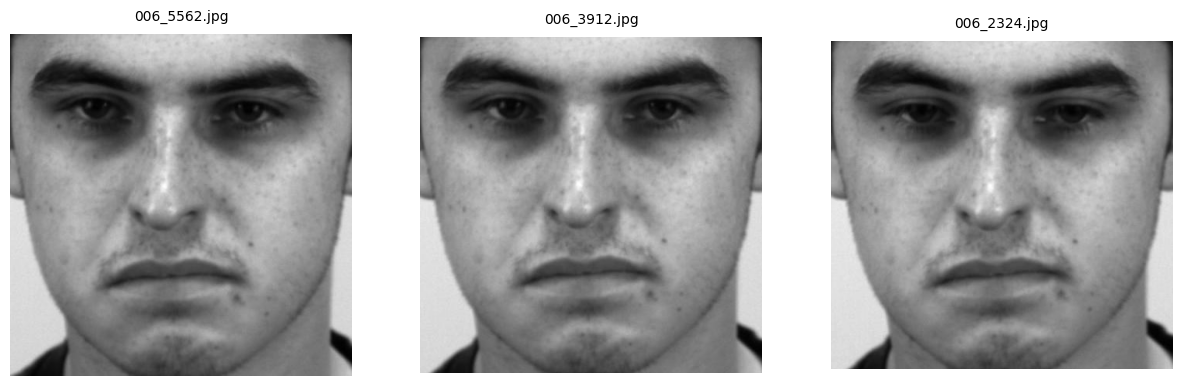


---
**Informazioni per le immagini del dataset SAMM**
**Nome immagine:** 006_5562.jpg
**Percorso immagine:** /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements_Extract/006_1_2/006_5562.jpg
- **Dimensioni:** 438 x 438 pixel
- **Formato:** JPEG
- **Canali:** RGB
- **Tipo di dati:** RGB (Scala di grigi (canali identici))
- **Rapporto d'aspetto (larghezza/altezza):** 1.0
---


---
**Informazioni per le immagini del dataset SAMM**
**Nome immagine:** 006_3912.jpg
**Percorso immagine:** /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements_Extract/006_1_3/006_3912.jpg
- **Dimensioni:** 441 x 433 pixel
- **Formato:** JPEG
- **Canali:** RGB
- **Tipo di dati:** RGB (Scala di grigi (canali identici))
- **Rapporto d'aspetto (larghezza/altezza):** 1.02
---


---
**Informazioni per le immagini del dataset SAMM**
**Nome immagine:** 006_2324.jpg
**Percorso immagine:** /content/drive/MyDrive/Workspace_Tesi/Datasets/SAMM/SAMM_IEEETAC_Movements_Extract/006_1_

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Percorso al file CSV creato in precedenza
csv_path = base_path_processed_data_files + '/final_frame_sequences_samm.csv'

# Importa il CSV creato in precedenza
df_csv_imported = pd.read_csv(csv_path)

# Funzione per visualizzare le immagini campione e mostrare ulteriori informazioni
def plot_sample_images(df, dataset_name, num_images=3):
    # Filtra il DataFrame per ottenere solo le righe del dataset desiderato
    dataset_df = df[df['Dataset'] == dataset_name]

    # Estrai i path dei frame dalla colonna Frame_Paths
    frame_paths = dataset_df['Frame Paths'].values[:num_images]

    # Crea il plot delle immagini campione
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    img_info_list = []  # Lista per raccogliere le informazioni delle immagini

    for i, frame_path_list in enumerate(frame_paths):
        # Prendi il primo frame della sequenza e aggiungi il base_path_dataset
        img_path = os.path.join(base_path_datasets, eval(frame_path_list)[0])  # Primo frame con base path
        img = Image.open(img_path)
        img_name = os.path.basename(img_path)  # Nome del file immagine

        # Mostra l'immagine con il nome come titolo
        axes[i].imshow(img, cmap="gray" if img.mode != 'RGB' else None)  # Mostra in scala di grigi se non è RGB
        axes[i].axis('off')
        axes[i].set_title(img_name, fontsize=10, pad=10)  # Titolo con nome dell'immagine

        # Determina se l'immagine è a colori o in scala di grigi
        if img.mode == 'RGB':
            # Controlla se i canali sono identici per determinare se è una scala di grigi
            r, g, b = img.split()
            if list(r.getdata()) == list(g.getdata()) == list(b.getdata()):
                color_info = "Scala di grigi (canali identici)"
            else:
                color_info = "A colori (RGB)"
        else:
            color_info = "Scala di grigi"

        # Ottieni informazioni sull'immagine e salva nella lista
        img_info = (
            f"\n---\n"
            f"**Informazioni per le immagini del dataset {dataset_name}**\n"
            f"**Nome immagine:** {img_name}\n"
            f"**Percorso immagine:** {img_path}\n"
            f"- **Dimensioni:** {img.size[0]} x {img.size[1]} pixel\n"
            f"- **Formato:** {img.format}\n"
            f"- **Canali:** {'RGB' if img.mode == 'RGB' else 'Grayscale'}\n"
            f"- **Tipo di dati:** {img.mode} ({color_info})\n"
            f"- **Rapporto d'aspetto (larghezza/altezza):** {round(img.size[0] / img.size[1], 2)}"
            f"\n---\n"
        )
        img_info_list.append(img_info)  # Aggiungi le informazioni alla lista

    # Aggiungi una linea di separazione sopra il gruppo di informazioni
    print(f"\n====== Inizio informazioni per il dataset {dataset_name} ======\n")
    # Mostra le immagini
    plt.show()

    for info in img_info_list:
        print(info)
    print("="*100 + "\n")


# Visualizza 3 immagini campione del dataset SAMM
plot_sample_images(df_csv_imported, 'SAMM', num_images=3)


Verifico se il dataset è bilanciato

Conteggio delle immagini per ciascuna emozione:
Estimated Emotion
Anger        56
Other        26
Happiness    26
Surprise     15
Contempt     11
Disgust       9
Fear          8
Sadness       6
Name: count, dtype: int64


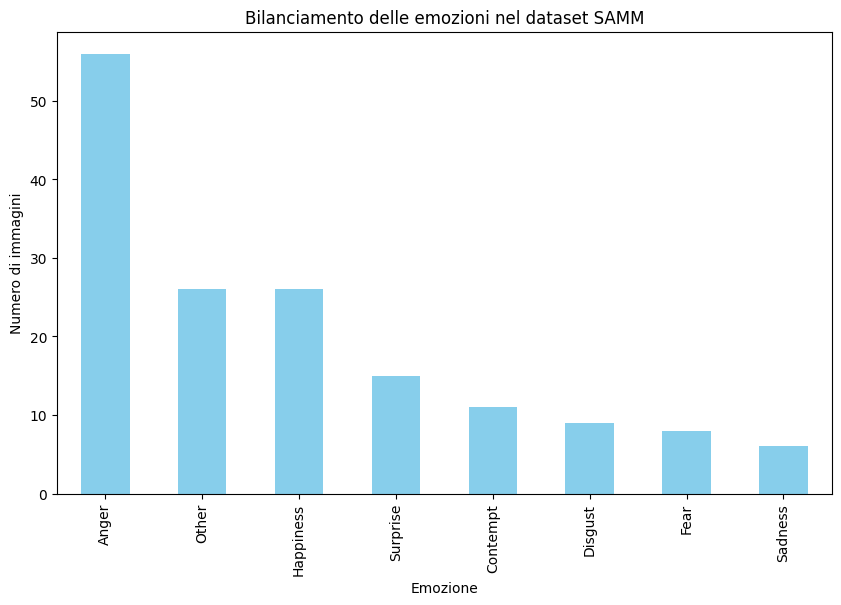

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
file_path = base_path_processed_data_files + '/final_frame_sequences_samm.csv'
df = pd.read_csv(file_path)

# Conta le occorrenze di ciascuna emozione
emotion_counts = df['Estimated Emotion'].value_counts()

# Stampa i valori effettivi per ciascuna emozione
print("Conteggio delle immagini per ciascuna emozione:")
print(emotion_counts)

# Visualizza il bilanciamento con un grafico a barre
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Bilanciamento delle emozioni nel dataset SAMM')
plt.xlabel('Emozione')
plt.ylabel('Numero di immagini')
plt.show()


Effettuiamo l'operazione di Data-Augumentation per bilanciare le classi del dataset

L’approccio che segue applica augmentation in modo moderato per le classi minoritarie e aggiunge la configurazione dei class weights al modello. Il primo passaggio modifica la funzione di augmentation in base alla disponibilità dei dati; il secondo, invece, riguarda l’applicazione dei pesi di classe durante l’addestramento.

Di seguito, integrerò l’utilizzo dei class weights in modo che il tuo modello compensi eventuali squilibri rimasti:

2. Creo un nuovo codice per l'augumentation in modo da aggiungere il controllo sul fatto che una sequenza già augumentata è meglio se non venisse nuovamente augumentata.*********************

In [ ]:
import cv2
import os
import random
import numpy as np
import pandas as pd

# Funzione per applicare una specifica augmentation a un'immagine
def augment_image(image, flip=False, angle=0, brightness=1.0, contrast=1.0):
    if flip:
        image = cv2.flip(image, 1)  # Riflesso orizzontale
    if angle != 0:
        h, w = image.shape[:2]
        M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)
        image = cv2.warpAffine(image, M, (w, h))

    # Applicazione di luminosità e contrasto
    image = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)

    return image

# Directory per il dataset bilanciato
augmented_base_dir = base_path_datasets + "/Augmented_Datasets"
os.makedirs(augmented_base_dir, exist_ok=True)

# Percorso al file CSV creato in precedenza
csv_path = base_path_processed_data_files + '/final_frame_sequences_samm.csv'
df_csv_imported = pd.read_csv(csv_path)

# Calcola la distribuzione attuale
class_counts = df_csv_imported['Emotion Value'].value_counts().to_dict()

# Determina il target count come una media tra il massimo e la media delle classi
target_count = int(np.mean([max(class_counts.values()), np.mean(list(class_counts.values()))]))

# Lista per memorizzare nuove righe
new_rows = []

# Per ogni classe non bilanciata
for emotion_value in class_counts.keys():
    current_count = class_counts[emotion_value]
    num_augmentations_needed = target_count - current_count

    # Crea la cartella per la classe corrente con il nome dell'emozione
    sequences = df_csv_imported[df_csv_imported['Emotion Value'] == emotion_value]

    # Limita il numero di augmentazioni per evitare ridondanze
    num_augmentations_needed = min(num_augmentations_needed, len(sequences) * 2)

    for seq_idx in range(num_augmentations_needed):
        # Scegli una sequenza a caso da duplicare
        row = sequences.sample(n=1).iloc[0]
        frame_paths = eval(row['Frame Paths'])

        # Crea una cartella per la nuova sequenza aumentata
        class_dir = os.path.join(augmented_base_dir, f"{row['Estimated Emotion']}")
        os.makedirs(class_dir, exist_ok=True)

        sequence_dir = os.path.join(class_dir, f"Sequenza_{current_count + seq_idx + 1}_Augmentata")
        os.makedirs(sequence_dir, exist_ok=True)

        # Seleziona augmentazioni casuali per l'intera sequenza
        flip = random.choice([True, False])
        angle = random.randint(-10, 10) if random.choice([True, False]) else 0
        brightness = random.uniform(0.8, 1.2)
        contrast = random.uniform(0.8, 1.2)

        new_frame_paths = []

        # Applica la stessa augmentation a ogni frame della sequenza
        for frame_idx, frame_path in enumerate(frame_paths):
            image_path = os.path.join(base_path_workspace + "/Datasets", frame_path)
            image = cv2.imread(image_path)

            if image is None:
                print(f"Errore nel caricamento dell'immagine: {image_path}")
                continue

            augmented_image = augment_image(image, flip=flip, angle=angle, brightness=brightness, contrast=contrast)

            # Estrae il nome originale dell'immagine senza estensione
            original_image_name = os.path.splitext(os.path.basename(frame_path))[0]
            output_img_name = f"{original_image_name}_Augmented_{frame_idx + 1}.jpg"
            output_img_path = os.path.join(sequence_dir, output_img_name)

            cv2.imwrite(output_img_path, augmented_image)

            # Aggiunge il percorso relativo a partire da 'Augmented_Datasets' all'elenco
            relative_output_path = os.path.relpath(output_img_path, augmented_base_dir)
            new_frame_paths.append(f"Augmented_Datasets/{relative_output_path}")

        # Aggiungi la nuova riga al DataFrame se ci sono frame augmentati
        if new_frame_paths:
            new_row = {
                'Dataset': row['Dataset'],
                'Frame Sequence': row['Frame Sequence'],
                'Frame Paths': new_frame_paths,
                'Estimated Emotion': row['Estimated Emotion'],
                'Emotion Value': emotion_value,
                'Num Frames': len(new_frame_paths)
            }
            new_rows.append(new_row)

        print(f"Sequenza {current_count + seq_idx + 1} della classe {emotion_value} aumentata e salvata.")

# Converti la lista di nuove righe in un DataFrame e concatenalo al DataFrame originale
df_new_rows = pd.DataFrame(new_rows)
df_csv_imported = pd.concat([df_csv_imported, df_new_rows], ignore_index=True)

# Salva il DataFrame aggiornato nel CSV
df_csv_imported.to_csv(csv_path, index=False)

print("Processo di augmentation completato.")

Sequenza 27 della classe 6 aumentata e salvata.
Sequenza 28 della classe 6 aumentata e salvata.
Sequenza 29 della classe 6 aumentata e salvata.
Sequenza 30 della classe 6 aumentata e salvata.
Sequenza 31 della classe 6 aumentata e salvata.
Sequenza 32 della classe 6 aumentata e salvata.
Sequenza 33 della classe 6 aumentata e salvata.
Sequenza 34 della classe 6 aumentata e salvata.
Sequenza 35 della classe 6 aumentata e salvata.
Sequenza 36 della classe 6 aumentata e salvata.
Sequenza 37 della classe 6 aumentata e salvata.
Sequenza 27 della classe 0 aumentata e salvata.
Sequenza 28 della classe 0 aumentata e salvata.
Sequenza 29 della classe 0 aumentata e salvata.
Sequenza 30 della classe 0 aumentata e salvata.
Sequenza 31 della classe 0 aumentata e salvata.
Sequenza 32 della classe 0 aumentata e salvata.
Sequenza 33 della classe 0 aumentata e salvata.
Sequenza 34 della classe 0 aumentata e salvata.
Sequenza 35 della classe 0 aumentata e salvata.
Sequenza 36 della classe 0 aumentata e s

Conteggio delle immagini per ciascuna emozione:
Estimated Emotion
Anger        56
Surprise     37
Other        37
Happiness    37
Contempt     33
Disgust      27
Fear         24
Sadness      18
Name: count, dtype: int64


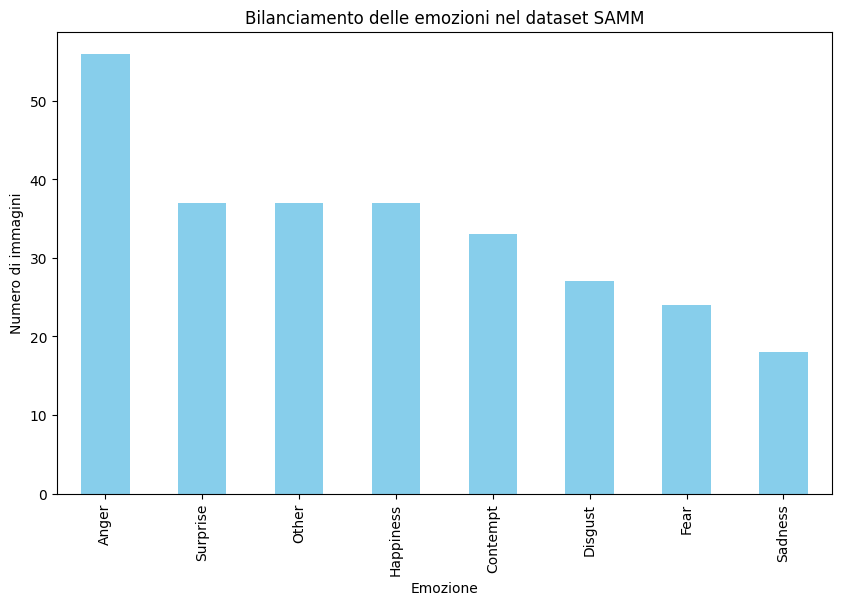

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
file_path = base_path_processed_data_files + '/final_frame_sequences_samm.csv'
df = pd.read_csv(file_path)

# Conta le occorrenze di ciascuna emozione
emotion_counts = df['Estimated Emotion'].value_counts()

# Stampa i valori effettivi per ciascuna emozione
print("Conteggio delle immagini per ciascuna emozione:")
print(emotion_counts)

# Visualizza il bilanciamento con un grafico a barre
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Bilanciamento delle emozioni nel dataset SAMM')
plt.xlabel('Emozione')
plt.ylabel('Numero di immagini')
plt.show()


# Step 3:  
### Fase di Addestramento


## Addestramento con architettura CNN3D

Numero totale di sequenze: 269
Numero di sequenze per l'addestramento: 215
Numero di sequenze per la validazione: 54
Forma di X_train: (215, 5, 112, 112, 1), y_train: (215, 8)
Forma di X_val: (54, 5, 112, 112, 1), y_val: (54, 8)
Sequenza 1: Forma: (5, 112, 112, 1)


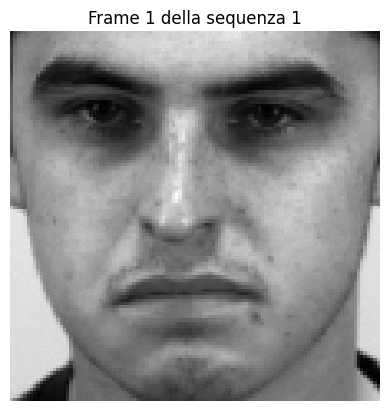

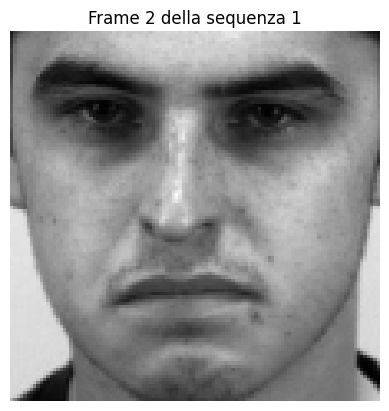

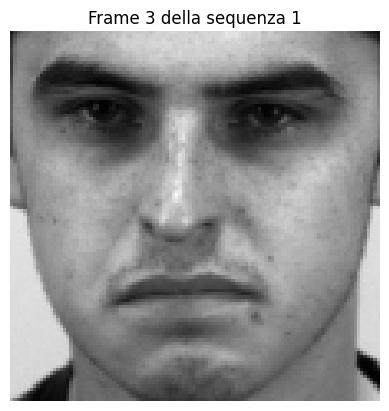

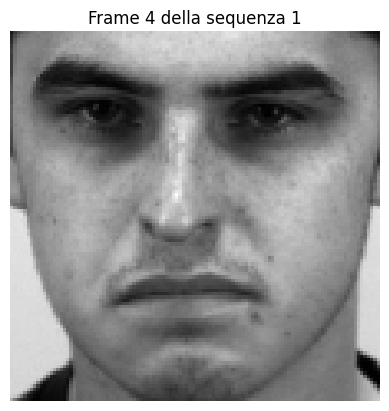

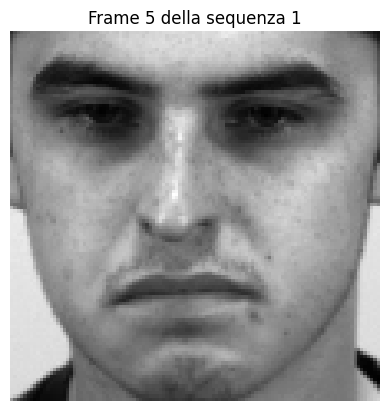

Sequenza 2: Forma: (5, 112, 112, 1)


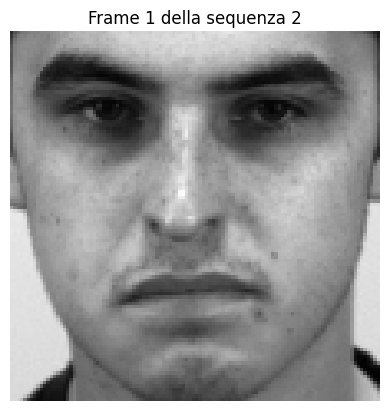

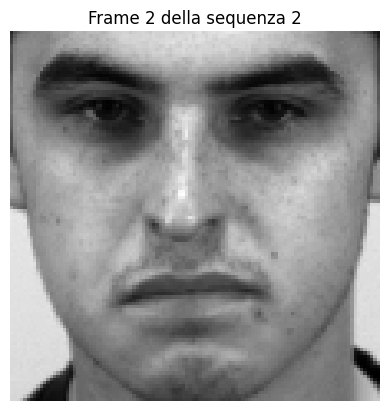

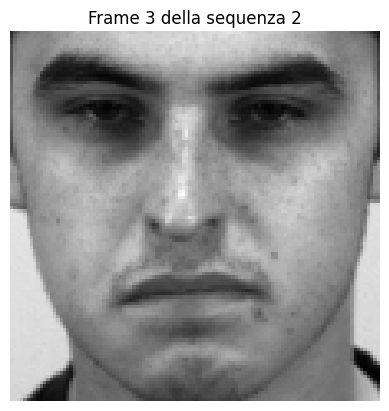

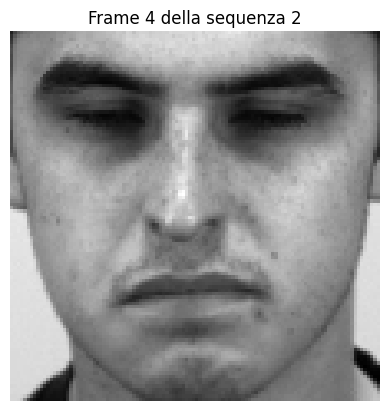

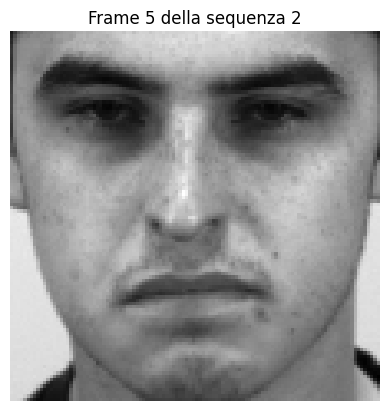

Sequenza 3: Forma: (5, 112, 112, 1)


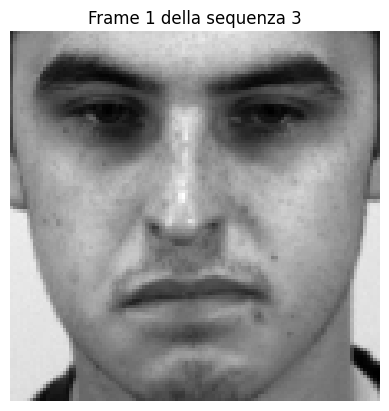

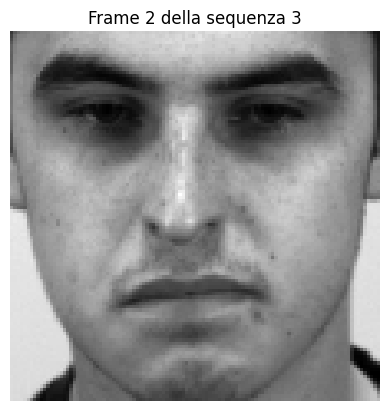

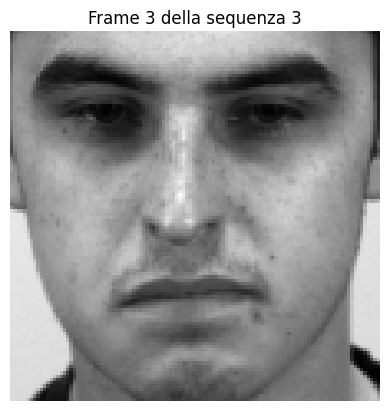

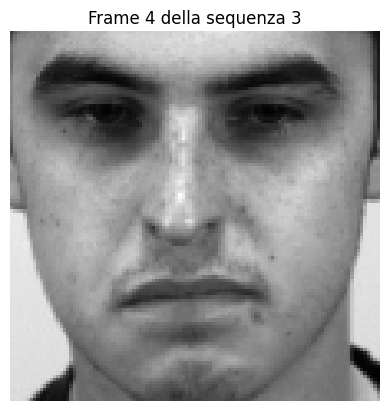

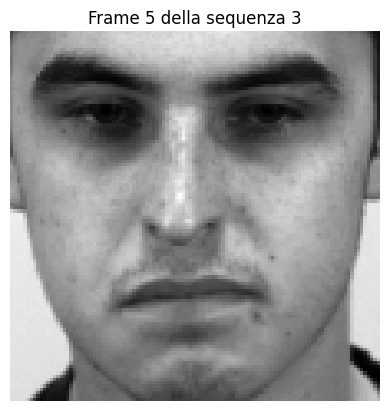

Sequenza 4: Forma: (5, 112, 112, 1)


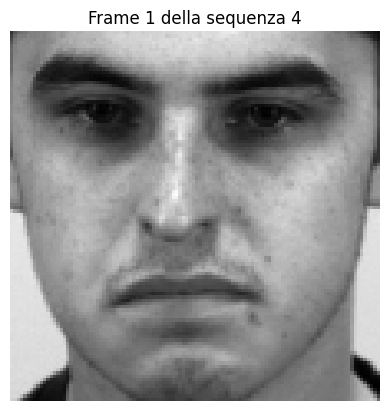

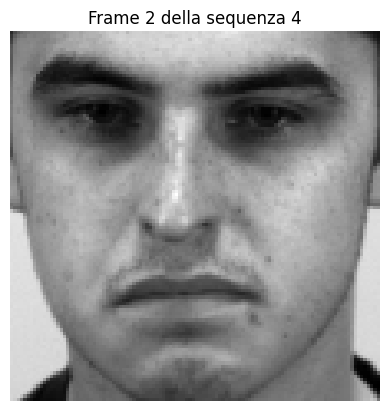

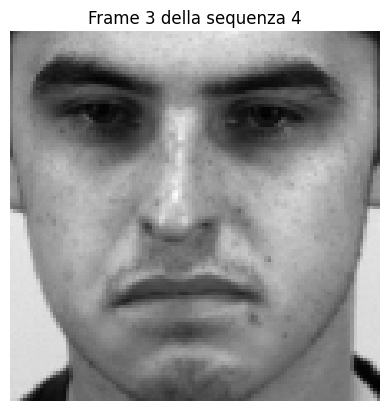

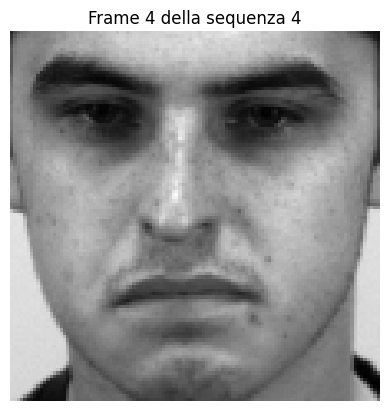

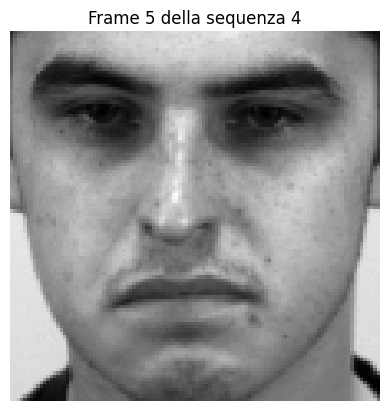

Sequenza 5: Forma: (5, 112, 112, 1)


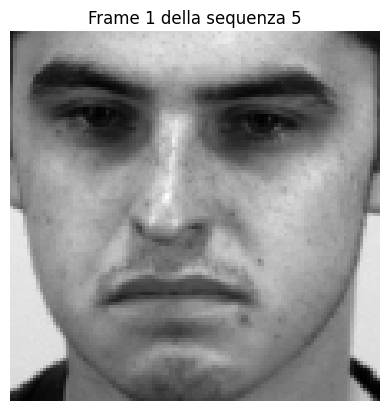

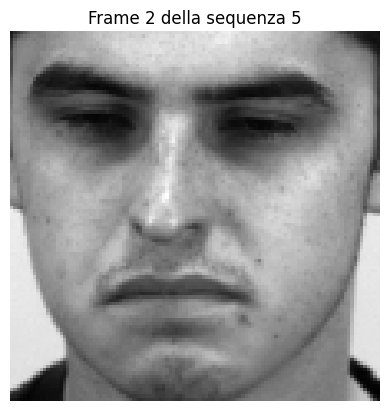

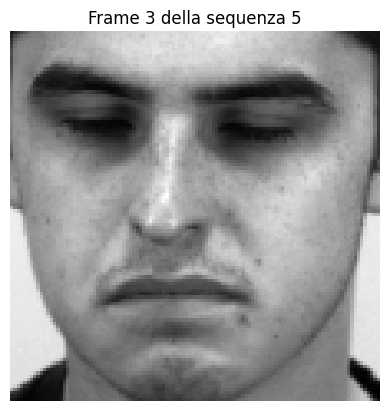

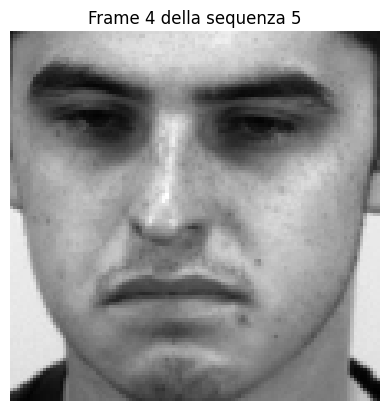

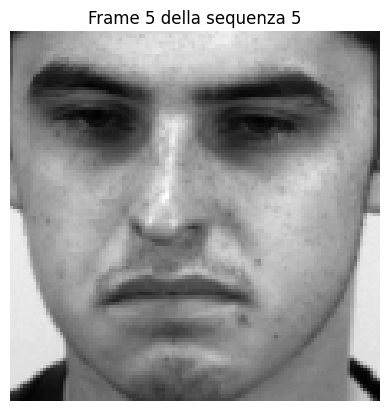

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.1193 - loss: 2.3688
Epoch 1: val_loss improved from inf to 2.08119, saving model to /content/drive/MyDrive/Workspace_Tesi/Models_Training/CNN3D_No_Finetuning/samm_micro_expression_model_best_3D.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 296ms/step - accuracy: 0.1195 - loss: 2.3634 - val_accuracy: 0.1667 - val_loss: 2.0812 - learning_rate: 0.0010
Epoch 2/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1385 - loss: 1.9962
Epoch 2: val_loss improved from 2.08119 to 2.07899, saving model to /content/drive/MyDrive/Workspace_Tesi/Models_Training/CNN3D_No_Finetuning/samm_micro_expression_model_best_3D.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.1366 - loss: 2.0020 - val_accuracy: 0.1296 - val_loss: 2.0790 - learning_rate: 0.0010
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1243 - loss: 2.1261
Epoch 3: val_loss improved from 2.07899 to 2.07601, saving model to /content/drive/MyDrive/Work

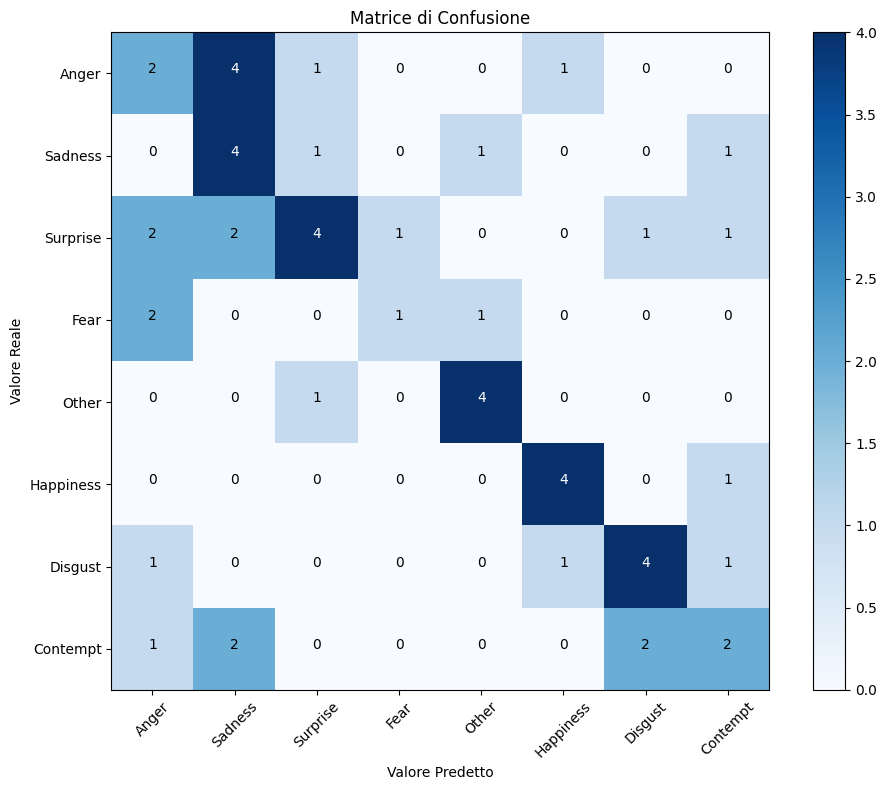

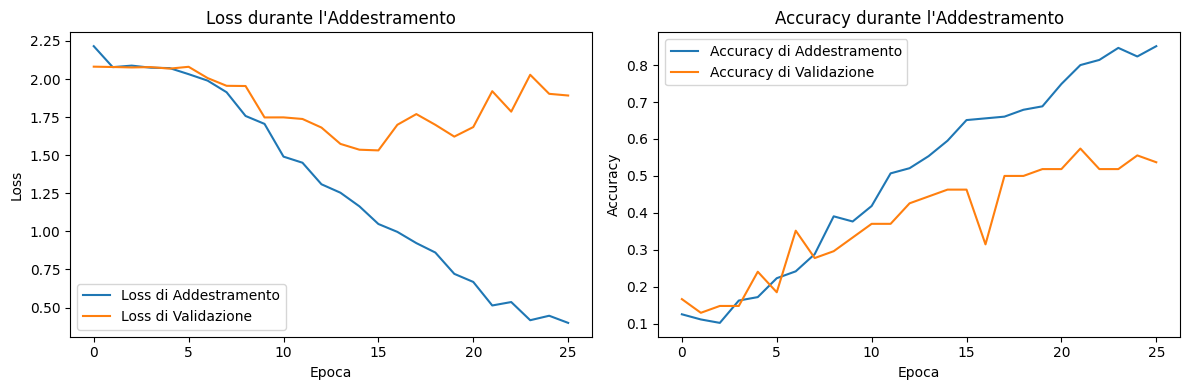

In [ ]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Definire il percorso principale in cui sarà contenuto tutto il materiale
base_path_workspace = "/content/drive/MyDrive/Workspace_Tesi"
base_path_datasets = '/content/drive/MyDrive/Workspace_Tesi/Datasets'
base_path_processed_data_files = '/content/drive/MyDrive/Workspace_Tesi/New_Processed_Data_Files'
base_path_save_model = base_path_workspace + '/Models_Training/CNN3D_No_Finetuning'

# Carica il dataset
samm_data_cleaned = pd.read_csv(base_path_processed_data_files + '/final_frame_sequences_samm.csv')

# Funzione per caricare le sequenze di frame
def load_sequences(frame_paths_list):
    sequences = []
    for frame_paths in frame_paths_list:
        frames = []
        for path in eval(frame_paths):  # Converte la stringa in lista
            img = cv2.imread(base_path_datasets + '/' + path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (112, 112))  # Ridimensiona ogni frame
            frames.append(img.astype('float32') / 255.0)  # Normalizza i valori
        if len(frames) > 0:
            sequences.append(np.array(frames))
    return np.array(sequences)

# Carica le sequenze e le etichette
X = load_sequences(samm_data_cleaned['Frame Paths'])
y = to_categorical(samm_data_cleaned['Emotion Value'], num_classes=len(samm_data_cleaned['Emotion Value'].unique()))

# Aggiungi una dimensione per i canali (necessario per CNN3D)
X = X[..., np.newaxis]  # (batch_size, num_frames, height, width, channels)

# Divisione del dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Calcola i pesi delle classi
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y, axis=1)), y=np.argmax(y, axis=1))
class_weights_dict = dict(enumerate(class_weights))


# Stampa il numero totale di sequenze
print(f"Numero totale di sequenze: {len(X)}")
print(f"Numero di sequenze per l'addestramento: {len(X_train)}")
print(f"Numero di sequenze per la validazione: {len(X_val)}")

# Verifica le forme
print(f"Forma di X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Forma di X_val: {X_val.shape}, y_val: {y_val.shape}")

# Debugging: Visualizza alcune sequenze
for i, seq in enumerate(X[:5]):  # Mostra le prime 5 sequenze
    print(f"Sequenza {i + 1}: Forma: {seq.shape}")
    for j, frame in enumerate(seq):
        plt.imshow(frame.squeeze(), cmap='gray')
        plt.title(f"Frame {j + 1} della sequenza {i + 1}")
        plt.axis('off')
        plt.show()

# Definizione del modello CNN3D
model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(5, 112, 112, 1), padding='same'),
    MaxPooling3D(pool_size=(1, 2, 2)),  # Conserva la dimensione temporale
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    MaxPooling3D(pool_size=(1, 2, 2)),  # Conserva la dimensione temporale
    Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    MaxPooling3D(pool_size=(1, 2, 2)),  # Conserva la dimensione temporale
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compilazione del modello
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback per l'addestramento
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
model_checkpoint = ModelCheckpoint(
    filepath=base_path_save_model + '/samm_micro_expression_model_best_3D.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Addestramento del modello
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,  # Ridotto per gestire l'aumento del consumo di memoria
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

# Salvataggio del modello
model.save(base_path_save_model + '/samm_micro_expression_model_3D.keras')

# Valutazione del modello
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Report di classificazione
print(classification_report(y_true_classes, y_pred_classes, target_names=samm_data_cleaned['Estimated Emotion'].unique()))

# Matrice di confusione
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.title('Matrice di Confusione')
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(conf_matrix))
    plt.xticks(tick_marks, samm_data_cleaned['Estimated Emotion'].unique(), rotation=45)
    plt.yticks(tick_marks, samm_data_cleaned['Estimated Emotion'].unique())

    thresh = conf_matrix.max() / 2
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment='center',
                 color='white' if conf_matrix[i, j] > thresh else 'black')

    plt.ylabel('Valore Reale')
    plt.xlabel('Valore Predetto')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_true_classes, y_pred_classes)

# Grafico di Loss e Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Grafico della Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss di Addestramento')
    plt.plot(history.history['val_loss'], label='Loss di Validazione')
    plt.title('Loss durante l\'Addestramento')
    plt.xlabel('Epoca')
    plt.ylabel('Loss')
    plt.legend()

    # Grafico dell'Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy di Addestramento')
    plt.plot(history.history['val_accuracy'], label='Accuracy di Validazione')
    plt.title('Accuracy durante l\'Addestramento')
    plt.xlabel('Epoca')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


## Addestramento con architettura CNN3D-LSTM

Forma di X_train: (215, 5, 112, 112, 1), y_train: (215, 8)
Forma di X_val: (54, 5, 112, 112, 1), y_val: (54, 8)
Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1457 - loss: 2.1004
Epoch 1: val_loss improved from inf to 2.04649, saving model to /content/drive/MyDrive/Workspace_Tesi/Models_Training/CNN3D_LSTM/samm_micro_expression_model_best_CNN3D_LSTM.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.1470 - loss: 2.0998 - val_accuracy: 0.2037 - val_loss: 2.0465 - learning_rate: 0.0010
Epoch 2/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1893 - loss: 2.0512
Epoch 2: val_loss improved from 2.04649 to 2.04422, saving model to /content/drive/MyDrive/Workspace_Tesi/Models_Training/CNN3D_LSTM/samm_micro_expression_model_best_CNN3D_LSTM.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.1881 - loss: 2.0515 - val_accuracy: 0.2037 - val_loss: 2.0442 - learning_rate: 0.0010
Epoch 3/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1974 - 

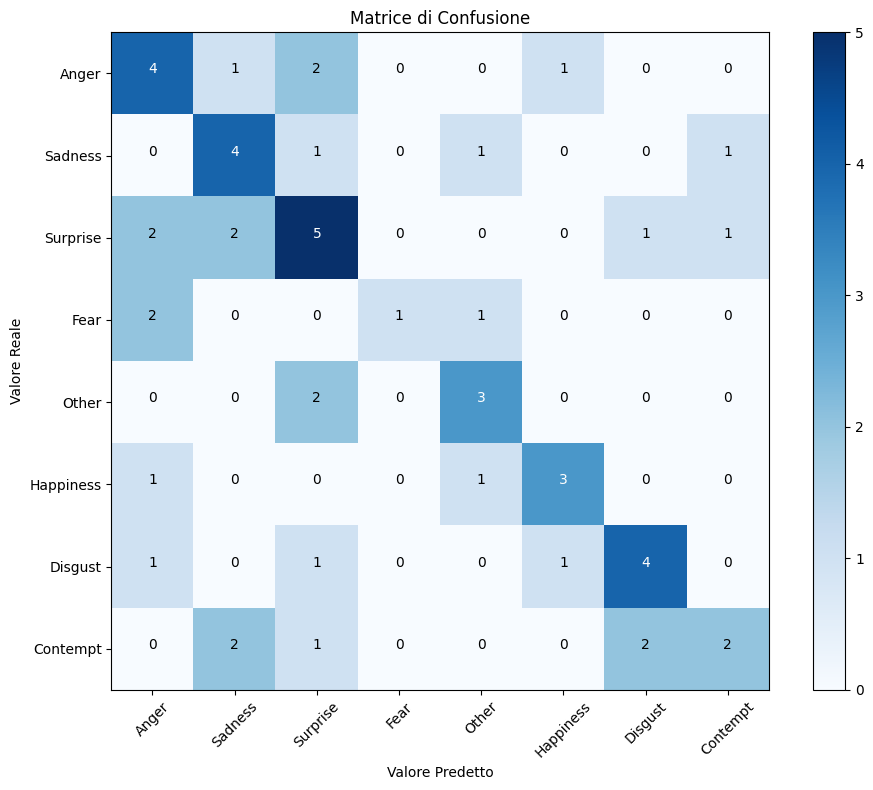

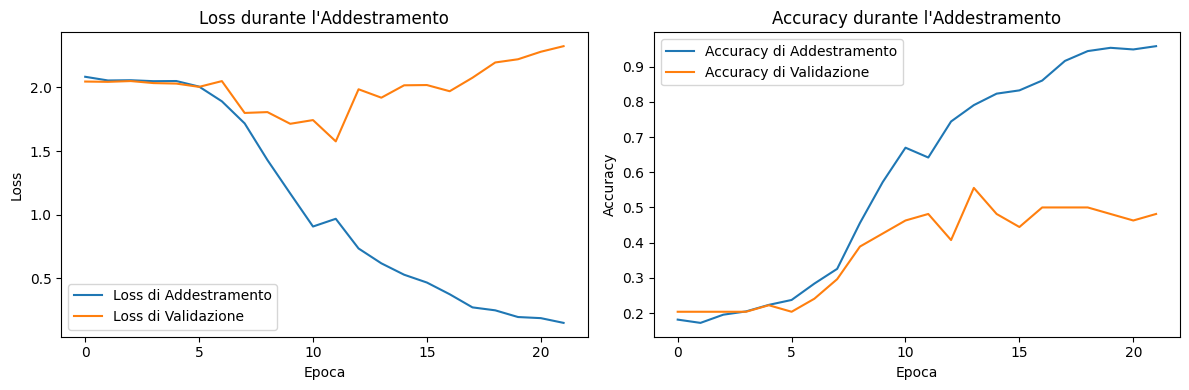

In [ ]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, LSTM, TimeDistributed, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Definire i percorsi principali
base_path_workspace = "/content/drive/MyDrive/Workspace_Tesi"
base_path_datasets = '/content/drive/MyDrive/Workspace_Tesi/Datasets'
base_path_processed_data_files = '/content/drive/MyDrive/Workspace_Tesi/New_Processed_Data_Files'
base_path_save_model = base_path_workspace + '/Models_Training/CNN3D_LSTM'
base_path_save_training_result = base_path_workspace + '/Training_Results_XLSX'

# Carica il dataset
samm_data_cleaned = pd.read_csv(base_path_processed_data_files + '/final_frame_sequences_samm.csv')

# Funzione per caricare le sequenze di frame
def load_sequences(frame_paths_list):
    sequences = []
    for frame_paths in frame_paths_list:
        frames = []
        for path in eval(frame_paths):  # Converte la stringa in lista
            img = cv2.imread(base_path_datasets + '/' + path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (112, 112))  # Ridimensiona ogni frame
            frames.append(img.astype('float32') / 255.0)  # Normalizza i valori
        if len(frames) > 0:
            sequences.append(np.array(frames))
    return np.array(sequences)

# Carica le sequenze e le etichette
X = load_sequences(samm_data_cleaned['Frame Paths'])
y = to_categorical(samm_data_cleaned['Emotion Value'], num_classes=len(samm_data_cleaned['Emotion Value'].unique()))

# Aggiungi una dimensione per i canali (necessario per CNN3D)
X = X[..., np.newaxis]  # (batch_size, num_frames, height, width, channels)

# Divisione del dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verifica le forme
print(f"Forma di X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Forma di X_val: {X_val.shape}, y_val: {y_val.shape}")

# Definizione del modello CNN3D-LSTM
input_shape = (X_train.shape[1], 112, 112, 1)  # (num_frames, height, width, channels)
inputs = Input(shape=input_shape)

# Blocchi CNN3D
x = Conv3D(32, kernel_size=(3, 3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling3D(pool_size=(1, 2, 2))(x)
x = Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same')(x)
x = MaxPooling3D(pool_size=(1, 2, 2))(x)
x = Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same')(x)
x = MaxPooling3D(pool_size=(1, 2, 2))(x)

# TimeDistributed per LSTM
x = TimeDistributed(Flatten())(x)

# LSTM
x = LSTM(128, return_sequences=False)(x)

# Fully Connected Layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback per l'addestramento
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
model_checkpoint = ModelCheckpoint(
    filepath=base_path_save_model + '/samm_micro_expression_model_best_CNN3D_LSTM.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Addestramento del modello
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,  # Ridotto per gestire l'aumento del consumo di memoria
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

# Salvataggio del modello
model.save(base_path_save_model + '/samm_micro_expression_model_CNN3D_LSTM.keras')

# Valutazione del modello
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Report di classificazione
print(classification_report(y_true_classes, y_pred_classes, target_names=samm_data_cleaned['Estimated Emotion'].unique()))

# Matrice di confusione
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.title('Matrice di Confusione')
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(conf_matrix))
    plt.xticks(tick_marks, samm_data_cleaned['Estimated Emotion'].unique(), rotation=45)
    plt.yticks(tick_marks, samm_data_cleaned['Estimated Emotion'].unique())

    thresh = conf_matrix.max() / 2
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment='center',
                 color='white' if conf_matrix[i, j] > thresh else 'black')

    plt.ylabel('Valore Reale')
    plt.xlabel('Valore Predetto')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_true_classes, y_pred_classes)

# Grafico di Loss e Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Grafico della Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss di Addestramento')
    plt.plot(history.history['val_loss'], label='Loss di Validazione')
    plt.title('Loss durante l\'Addestramento')
    plt.xlabel('Epoca')
    plt.ylabel('Loss')
    plt.legend()

    # Grafico dell'Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy di Addestramento')
    plt.plot(history.history['val_accuracy'], label='Accuracy di Validazione')
    plt.title('Accuracy durante l\'Addestramento')
    plt.xlabel('Epoca')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


## Addestramento con architettura CNN-LSTM + finetuning ResNet50


Class Weights: {0: 0.9087837837837838, 1: 0.9087837837837838, 2: 0.6004464285714286, 3: 1.8680555555555556, 4: 1.4010416666666667, 5: 1.2453703703703705, 6: 0.9087837837837838, 7: 1.018939393939394}
Forma di X: (269, 5, 112, 112, 3), Forma di y: (269, 8)
Numero totale di sequenze: 269
Numero di sequenze per l'addestramento: 215
Numero di sequenze per la validazione: 54
Forma di X_train: (215, 5, 112, 112, 3), y_train: (215, 8)
Forma di X_val: (54, 5, 112, 112, 3), y_val: (54, 8)
Epoch 1/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0746 - loss: 2.2586
Epoch 1: val_loss improved from inf to 2.09748, saving model to /content/drive/MyDrive/Workspace_Tesi/Models_Training/CNN3D_LSTM_Finetuning/samm_micro_expression_finetuned_best.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 549ms/step - accuracy: 0.0744 - loss: 2.2554 - val_accuracy: 0.1667 - val_loss: 2.0975 - learning_rate: 1.0000e-04
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.1626 - loss: 2.1963
Epoch 2: val_lo

1/2 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step
              precision    recall  f1-score   support

       Anger       0.44      0.50      0.47         8
     Sadness       0.20      0.29      0.24         7
    Surprise       1.00      0.09      0.17        11
        Fear       0.67      0.50      0.57         4
       Other       0.36      0.80      0.50         5
   Happiness       0.38      0.60      0.46         5
     Disgust       0.38      0.43      0.40         7
    Contempt       0.50      0.29      0.36         7

    accuracy                           0.39        54
   macro avg       0.49      0.44      0.40        54
weighted avg       0.53      0.39      0.36        54



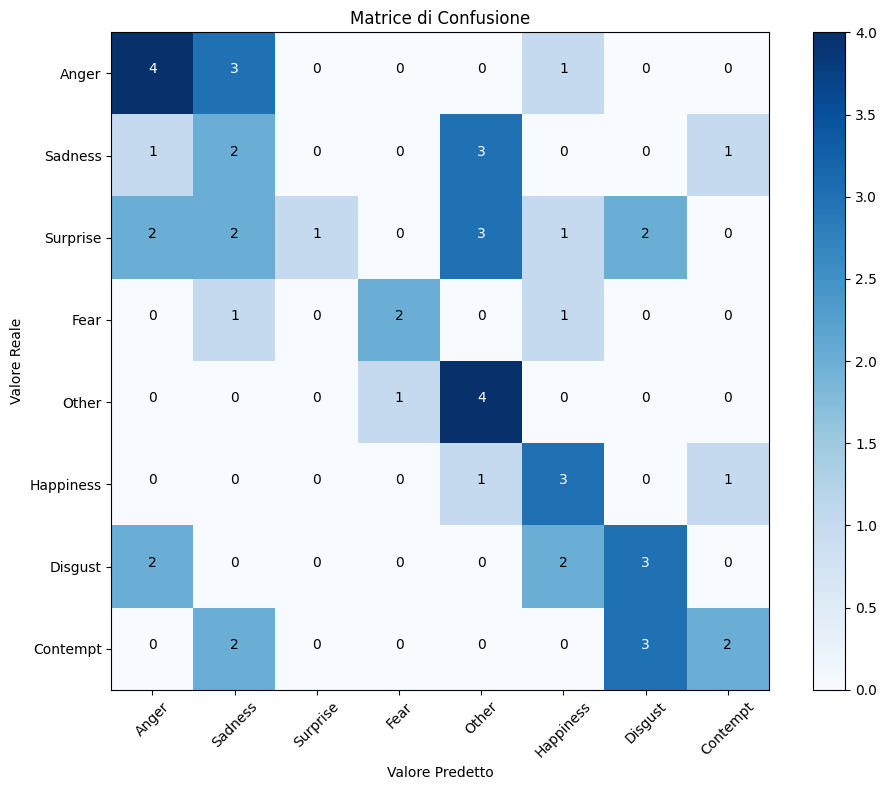

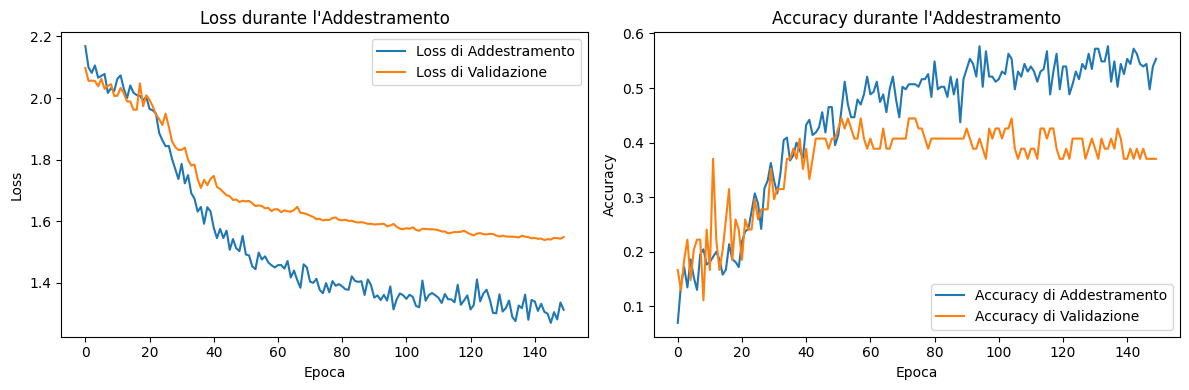

In [ ]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, TimeDistributed, LSTM, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import ResNet50

# Definire i percorsi principali
base_path_workspace = "/content/drive/MyDrive/Workspace_Tesi"
base_path_datasets = '/content/drive/MyDrive/Workspace_Tesi/Datasets'
base_path_processed_data_files = '/content/drive/MyDrive/Workspace_Tesi/New_Processed_Data_Files'
base_path_save_model = base_path_workspace + '/Models_Training/CNN3D_LSTM_Finetuning'

# Carica il dataset
samm_data_cleaned = pd.read_csv(base_path_processed_data_files + '/final_frame_sequences_samm.csv')



# Funzione per caricare le sequenze di frame (convertendo in RGB)
def load_sequences(frame_paths_list):
    sequences = []
    for frame_paths in frame_paths_list:
        frames = []
        for path in eval(frame_paths):  # Converte la stringa in lista
            img = cv2.imread(base_path_datasets + '/' + path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (112, 112))  # Ridimensiona ogni frame
            img = np.stack([img] * 3, axis=-1)  # Converti in RGB replicando il canale
            frames.append(img.astype('float32') / 255.0)  # Normalizza i valori
        if len(frames) > 0:
            sequences.append(np.array(frames))
    return np.array(sequences)

# Carica le sequenze e le etichette
X = load_sequences(samm_data_cleaned['Frame Paths'])  # Ora con immagini RGB
y = to_categorical(samm_data_cleaned['Emotion Value'], num_classes=len(samm_data_cleaned['Emotion Value'].unique()))

# Calcolo dei class weights
class_labels = np.argmax(y, axis=1)  # Converti da one-hot encoding a etichette semplici
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)

# Converte in dizionario per Keras
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)


# Aggiungi una dimensione per i canali (necessario per CNN3D)
print(f"Forma di X: {X.shape}, Forma di y: {y.shape}")

# Divisione del dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Stampa il numero totale di sequenze
print(f"Numero totale di sequenze: {len(X)}")
print(f"Numero di sequenze per l'addestramento: {len(X_train)}")
print(f"Numero di sequenze per la validazione: {len(X_val)}")


print(f"Forma di X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Forma di X_val: {X_val.shape}, y_val: {y_val.shape}")

# Modello base (ResNet50 pre-addestrato)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(112, 112, 3))
for layer in base_model.layers[:-4]:  # Congela i primi strati
    layer.trainable = False

# Modello completo
input_shape = (X_train.shape[1], 112, 112, 3)  # (num_frames, altezza, larghezza, canali RGB)
inputs = Input(shape=input_shape)

# TimeDistributed per sfruttare ResNet50 su ogni frame
x = TimeDistributed(base_model)(inputs)
x = TimeDistributed(Flatten())(x)

# LSTM per modellare la dipendenza temporale
x = LSTM(128, return_sequences=False)(x)

# Livelli completamente connessi per la classificazione
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback per l'addestramento
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
model_checkpoint = ModelCheckpoint(
    filepath=base_path_save_model + '/samm_micro_expression_finetuned_best.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Addestramento del modello
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=8,
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict,  # Aggiungi i pesi delle classi
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

# Salvataggio del modello e della storia dell'addestramento
model.save(base_path_save_model + '/samm_micro_expression_finetuned.keras')
with open(base_path_save_model + '/training_history.npy', 'wb') as f:
    np.save(f, history.history)

# Valutazione del modello
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Report di classificazione
print(classification_report(y_true_classes, y_pred_classes, target_names=samm_data_cleaned['Estimated Emotion'].unique()))

# Matrice di confusione
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.title('Matrice di Confusione')
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(conf_matrix))
    plt.xticks(tick_marks, samm_data_cleaned['Estimated Emotion'].unique(), rotation=45)
    plt.yticks(tick_marks, samm_data_cleaned['Estimated Emotion'].unique())

    thresh = conf_matrix.max() / 2
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment='center',
                 color='white' if conf_matrix[i, j] > thresh else 'black')

    plt.ylabel('Valore Reale')
    plt.xlabel('Valore Predetto')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_true_classes, y_pred_classes)

# Grafico di Loss e Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Grafico della Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss di Addestramento')
    plt.plot(history.history['val_loss'], label='Loss di Validazione')
    plt.title('Loss durante l\'Addestramento')
    plt.xlabel('Epoca')
    plt.ylabel('Loss')
    plt.legend()

    # Grafico dell'Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy di Addestramento')
    plt.plot(history.history['val_accuracy'], label='Accuracy di Validazione')
    plt.title('Accuracy durante l\'Addestramento')
    plt.xlabel('Epoca')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)